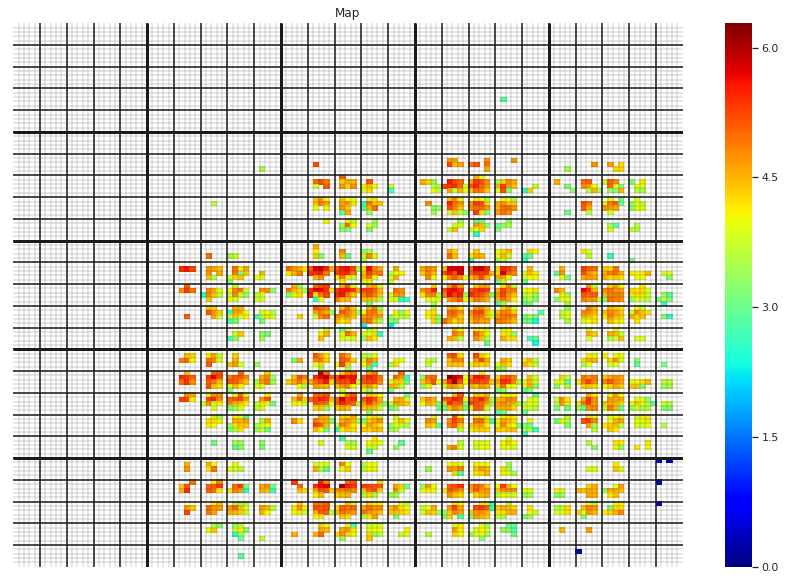

In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from math import sqrt

# configure this
num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
filename = "archive_800.dat" # text archive you want to present

bin_size = 1 / bin_per_dim
heat = np.empty(bin_per_dim ** num_dims)
heat[:] = np.nan

r,a,b,c,d,e,f,z,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_ = np.loadtxt(filename, unpack=True)

minscore, maxscore = 0, 0

j = 0
for i in r:
    heat[int(i)] = z[j]
    if z[j] > maxscore:
        maxscore = z[j]
    if z[j] < minscore:
        minscore = z[j]
    j += 1

dimxy = int(sqrt(bin_per_dim ** num_dims))

heat = np.reshape(heat, (dimxy, dimxy))

fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(15,10)})


thick_lines_pos = list(range(int(dimxy/5),int(dimxy),int(dimxy/5)))
lines_pos = list(range(int(dimxy/(5*5)),int(dimxy),int(dimxy/(5*5))))
thin_lines_pos = list(range(int(dimxy/(5*5*5)),int(dimxy),int(dimxy/(5*5*5))))

ax.hlines(thick_lines_pos, 0, dimxy, lw=3)
ax.vlines(thick_lines_pos, 0, dimxy, lw=3)

ax.hlines(lines_pos, 0, dimxy, lw=1.5)
ax.vlines(lines_pos, 0, dimxy, lw=1.5)

ax.hlines(thin_lines_pos, 0, dimxy, lw=0.2)
ax.vlines(thin_lines_pos, 0, dimxy, lw=0.2)

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
ax.set_facecolor('white')
with sns.axes_style("white"): # makes nan values white
    sns.heatmap(heat, mask=np.isnan(heat), vmin=minscore, vmax=maxscore, cmap="jet", xticklabels=False,
               yticklabels=False, linecolor='white').set_title("Map")
plt.savefig(filename + ".pdf")
plt.show()